<a href="https://colab.research.google.com/github/sairithwikredddy/EX_AI_LAB-_ASS/blob/main/EX_AI_ASS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:

df = pd.read_csv("/content/fake_news_dataset.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (4000, 24)


,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [ ]:
target = "label"
X = df.drop(columns=[target])
y = df[target]

y = y.map({'Fake': 0, 'Real': 1})

X = pd.get_dummies(X, drop_first=True)

print("Final features shape:", X.shape)
X.head()

Final features shape: (4000, 9471)


,id,sentiment_score,word_count,char_count,has_images,has_videos,readability_score,num_shares,num_comments,is_satirical,...,source_Washington Post,category_Entertainment,category_Health,category_Politics,category_Sports,category_Technology,political_bias_Left,political_bias_Right,fact_check_rating_Mixed,fact_check_rating_TRUE
0,1,-0.22,1302,5070,0,0,66.18,47305,450,1,...,False,True,False,False,False,False,False,False,False,False
1,2,0.92,322,2722,1,0,41.10,39804,530,1,...,False,False,False,False,False,True,True,False,True,False
2,3,0.25,228,5904,0,1,30.04,45860,763,0,...,False,False,False,False,True,False,False,False,True,False
3,4,0.94,155,825,1,0,75.16,34222,945,1,...,False,False,False,False,True,False,False,False,False,True
4,5,-0.01,962,1087,1,0,43.90,35934,433,0,...,False,False,False,False,False,True,False,True,True,False


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [10]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.3f}")


Model Performance:
RMSE: 0.51
MAE:  0.50
R²:   -0.022


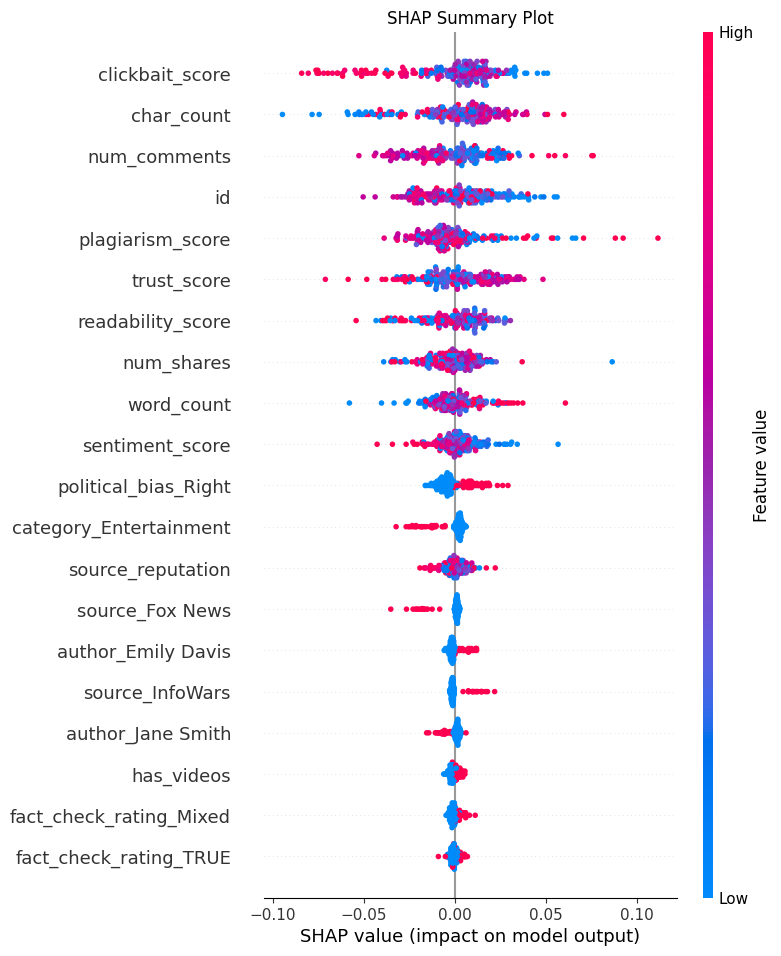

In [11]:
explainer = shap.TreeExplainer(model)
X_sample = X_test.sample(n=200, random_state=42)
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("SHAP Summary Plot")
plt.show()

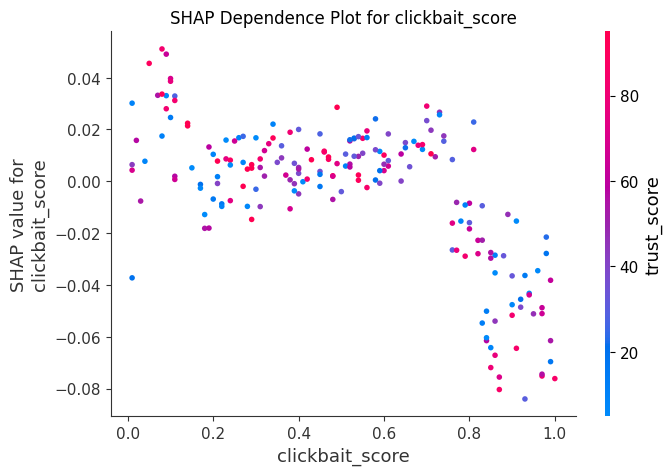

In [12]:
top_feature = X.columns[np.argsort(np.abs(shap_values).mean(axis=0))[::-1][0]]
shap.dependence_plot(top_feature, shap_values, X_sample, show=False)
plt.title(f"SHAP Dependence Plot for {top_feature}")
plt.show()

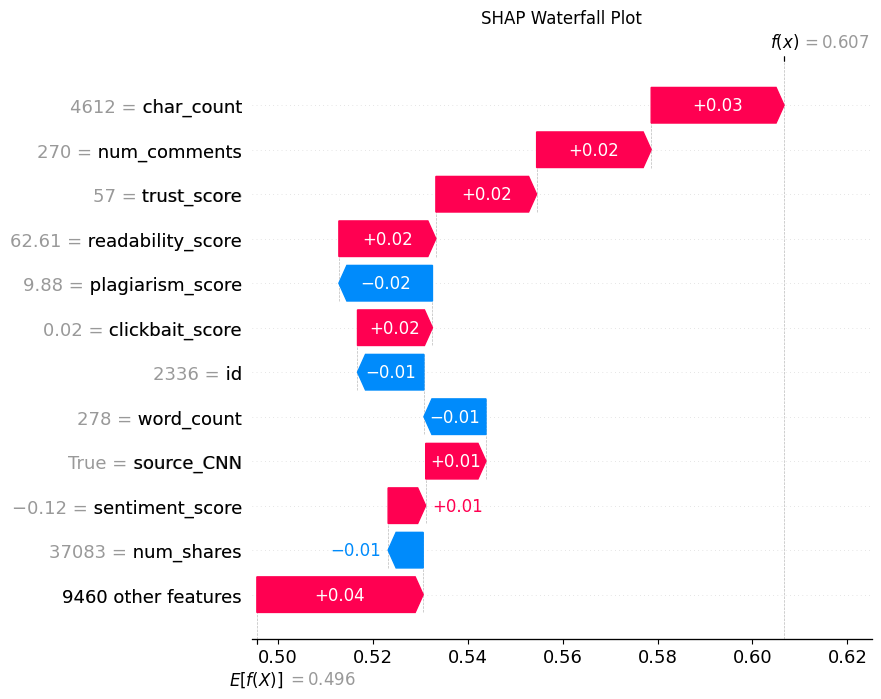

In [13]:
i = 0  # pick the first row in sample
exp = shap.Explanation(
    values=shap_values[i],
    base_values=np.array([explainer.expected_value]),
    data=X_sample.iloc[i, :].values,
    feature_names=X_sample.columns.tolist()
)
shap.plots.waterfall(exp, max_display=12, show=False)
plt.title("SHAP Waterfall Plot")
plt.show()

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nTop 10 features by model importance:")
importances.sort_values(ascending=False).head(10)



Top 10 features by model importance:


,0
char_count,0.063619
num_shares,0.063603
id,0.063553
readability_score,0.063249
num_comments,0.062778
plagiarism_score,0.061840
word_count,0.060197
sentiment_score,0.056072
trust_score,0.055489
clickbait_score,0.053174
